In [1]:
import keras


Using TensorFlow backend.


In [64]:
from keras import layers
from keras import models

In [2]:
import os, shutil

In [12]:
curr_dir=os.getcwd()

In [13]:
curr_dir

'C:\\Users\\shsubham\\program\\data-dancing\\tsf\\Untitled Folder'

In [21]:
source_data_path=os.path.join(curr_dir,'..','..','..','DATA','cats-dogs-img','train')

In [32]:
source_data_path


'C:\\Users\\shsubham\\program\\data-dancing\\tsf\\Untitled Folder\\..\\..\\..\\DATA\\cats-dogs-img\\train'

In [20]:
if  os.path.isdir(data_path):
    print('dir exists')
else:
    print('doesnot')

dir exists


In [24]:
train_dir=os.path.join(source_data_path,'..','train_dir')
validation_dir=os.path.join(source_data_path,'..','validation_dir')
test_dir=os.path.join(source_data_path,'..','test_dir')

In [28]:
for directory in (train_dir,validation_dir,test_dir):
    if not os.path.isdir(directory):
        os.makedirs(directory)
    if not os.path.isdir(os.path.join(directory,"cats")):
        os.makedirs(os.path.join(directory,"cats"))
        
    if not os.path.isdir(os.path.join(directory,"dogs")):
        os.makedirs(os.path.join(directory,"dogs"))

In [29]:
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]

In [53]:
#fnames
#train_cats_dir=os.path.join(directory,"cats")
def copy_file(source,dest,fnames):
    for fname in fnames:
        src = os.path.join(source, fname)
        #print(src)
        dst = os.path.join(dest, fname)
        #print(dst)
        shutil.copyfile(src, dst)

In [56]:
fnames_dog= ['dog.{}.jpg'.format(i) for i in range(1000)]
dest=os.path.join(source_data_path,'..','train_dir','dogs')
copy_file(source_data_path,dest,fnames_dog)

In [41]:
if  os.path.isdir(dest):
    print('dir exists')
else:
    print('doesnot')

dir exists


In [ ]:
C:\Users\shsubham\program\data-dancing\tsf\Untitled Folder\..\..\..\DATA\cats-dogs-img\train\dog.0.jpg
C:\Users\shsubham\program\data-dancing\tsf\Untitled Folder\..\..\..\DATA\cats-dogs-img\train\..\train_dir\dogs\dog.0.jpg
C:\Users\shsubham\program\data-dancing\tsf\Untitled Folder\..\..\..\DATA\cats-dogs-img\train\dog.1.jpg
C:\Users\shsubham\program\data-dancing\tsf\Untitled Folder\..\..\..\DATA\cats-dogs-img\train\..\train_dir\dogs\dog.1.jpg

In [50]:
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
train_dogs_dir=os.path.join(source_data_path,'..','train_dir','dogs')
for fname in fnames:
    src = os.path.join(source_data_path, fname)
    #print(src)
    dst = os.path.join(train_dogs_dir, fname)
    #print(dst)
    shutil.copyfile(src, dst)

In [44]:
train_dogs_dir

'C:\\Users\\shsubham\\program\\data-dancing\\tsf\\Untitled Folder\\..\\..\\..\\DATA\\cats-dogs-img\\train\\..\\train_dir\\dogs'

In [57]:
fnames_dog= ['dog.{}.jpg'.format(i) for i in range(1000,1500)]
dest=os.path.join(source_data_path,'..','validation_dir','dogs')
copy_file(source_data_path,dest,fnames_dog)

In [59]:
fnames_dog= ['cat.{}.jpg'.format(i) for i in range(1000,1500)]
dest=os.path.join(source_data_path,'..','validation_dir','cats')
copy_file(source_data_path,dest,fnames_dog)

In [61]:
fnames_cat_test= ['cat.{}.jpg'.format(i) for i in range(1500,2000)]
fnames_dog_test=['dog.{}.jpg'.format(i) for i in range(1500,2000)]
dest_dog=os.path.join(source_data_path,'..','test_dir','dogs')
dest_cat=os.path.join(source_data_path,'..','test_dir','cats')
copy_file(source_data_path,dest_dog,fnames_dog_test)
copy_file(source_data_path,dest_cat,fnames_cat_test)

In [63]:
print('total training cat images:', len(os.listdir(dest_cat)))

total training cat images: 500


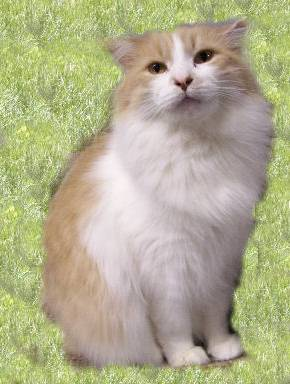

In [65]:
from IPython.display import Image 

desst=os.path.join(dest_cat,'cat.1600.jpg')
pil_img = Image(filename=desst)
display(pil_img)

In [71]:
import cv2

In [80]:
img = cv2.imread(desst)

In [75]:
image1=img[0:150,0:150,:]

In [78]:
img=image1

In [82]:
plt.show()

NameError: name 'plt' is not defined

In [83]:

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [84]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [85]:
from keras import optimizers
model.compile(loss='binary_crossentropy',
optimizer=optimizers.RMSprop(lr=1e-4),
metrics=['acc'])



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [86]:
from keras.preprocessing.image import ImageDataGenerator

In [89]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [87]:
#train_datagen.
train_dir=r'C:\Users\shsubham\program\DATA\cats-dogs-img\train_dir'
validation_dir=r'C:\Users\shsubham\program\DATA\cats-dogs-img\validation_dir'

In [90]:
train_generator = train_datagen.flow_from_directory(train_dir,target_size=(150, 150),batch_size=20,class_mode='binary')
validation_generator = test_datagen.flow_from_directory(validation_dir,target_size=(150, 150),batch_size=20,class_mode='binary')

Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
